# BMEN 509 - Laboratory 3 - Ultrasound Imaging - Lucas Ion

The purpose of this laboratory is to become familiar with ultrasound imaging, from acquisition to image reconstruction.

In this exercise, you will demonstrate:

1. Data acquistion fundamentals
2. An ability to perfom basic signal processing 
3. An understanding of ultrasound image reconstruction

Your rubric is as follows:
<img src="NotebookImages/RubricLab3.PNG" alt="RubricLab3" width="600"/>

Please use this notebook to complete your assignment. Sections to be completed are blank and are marked by `TODO`. Please submit both the Python notebook (.ipynb) and a PDF export (File > Download as > PDF).

### Objectives
1. Get hands on experience with real ultrasound data acquisition
2. Practice good safety and operating procedures when using ultrasound equipment
3. Gain an understanding of the apparatus used in ultrasound signal acquisition
4. Perform image reconstruction with data collected in the lab

## Question 1 - Ultrasound Transducer Characteristics

You have a transducer for transmitting signals and receiving reflections. Tranducers have many characteristics that influence the acquired image. Record the characteristics of the transducer used in the lab. List 3 characteristics and briefly explain their impact on the captured image.

*Add your answer here*

## The first aspect to analyze about the transducer is that it has a frequency of 7.5MHz. Frequency can play an important role in the ultimate resulting image that is generated by a transducer. Higher frequencies tend to result in higher resolution images, however their scope is limited as they are more focused on the superficial tissues. Where as lower frequencies result in a lower resolution image, but with higher penetrative properties. The frequency of this transducer (7.5MHz) acts as a good middle ground between resolution and penetrative properties.

## The second aspect to examined is that this model of transducer is an immersion transducer. Compared to a Contact Transducer, or a Delay line transducer. This model of transducer is able to examine objects that are much more difficult to examine with a contact transducer. However this is not without some difficulty, as immersion transducers require the use of a coupling agent.

## The third aspect to analyze is the actual transducer element size. For this photo, the transducer sports a 10mm Nominal Element Size. The element size can have an impact on the overall resolution on the resulting image. A larger element size typically translates to a higher resolution. Moreover, an elements size can also impact the field of view, with a larger element having a larger field of view.  However it is not without its draw backs, as a larger element can also be heavier and bulkier. 




## Question 2 - Acquisition System

The connections of the transducer to the pulser/receiver and to the acquisition system (oscilloscope) were checked following the the description in the lab notes. 

Provide a brief set-up methodology description with schematic drawing of these connections:

*Add your answer here*

Provide a brief safety measures description as discussed during the lab, and any measurements done during this procedure.

*Add your answer here*

## In the setup from the lab video, there were three primary componenets. There was the single element transducer that aquired the signal by sending one wave into the media, followed by the pulser-reciever that recieved the echos, followed by the oscilliscope that ultimately captures that signal from the pulser-reciever. There was also a computer present that was utilized to make sure the lab data was recorded from the oscilliscope and for any additonal calculations that may needed to be performed, post-processing.

![Question 2](/Users/lucasion/Desktop/BMEN509/BMEN509-UCID30088132/BMEN-509-Lab-3/Report/Question2-Image.png)

# Safety: 

## In order to ensure safety, the connectivity of the water will be kept below 2μS. This is to ensure that is has low conductivity to prevent electrical shocks. The value of 2 microsiemens per centimeter is what can be thought off as the maximum acceptable conducitvty that can still be safe.

## After ensuring the water is safe, we should also ensure that we avoid putting our hands in the water, while energy is being sent. This is to prevent electrocution.

## Moreover, all electrical devices need to be connected to a tested GFCI. This is because Ground Fault Circuit Interrupters (GFCIs) are safety devices that are made to guard and protect against the risk of electrical shock. We can further protect against electrocution by ensuring that we don't place our hands in the water, and that any spilled water is dried before energizing a device.

## Lastly hands should always be dry before operating any device.


Answer to the following questions providing calculations and the equations used to obtain those:
1. At which time do you register the first echo from your target?
2. Calculate the distance at which your target was placed
3. From the zoom into the signal that was acquired calculate the frequency and explain your calculation
4. What did you observe when the target was closer to the transducer? Why?
5. What did you observe when the filters in the pulser/receiver were changed? Why was the final value chosen a good one?

# Answers:

## 1.) Based on the first line aquired graph, it can be approximated that the first echo is located 78 μs from the target.

## 2.) Using the formula: $ c_{o} = \frac{d}{t}$, and isloating for $d$ we obtain: $ d = {c_{o}}{t}$, however to correctly calulate the distance we divide by 2, thus obtaining the formula: $$ d =\frac {{c_{o}}{t}}{2} $$ $$ therefore $$ $$d =\frac {{1500}\times{78E-6}}{2} = 0.0585m \space or \space  58.5mm $$

## 3.) By utilizing matplotlib qt and zooming into the figure, and analyzing the two peaks such that frequency can be interpreted as $ \frac{1}{T} $, between peak one found at 76.0262 μs and peak two found at 76.175 μs. We can calculate the period to be roughly about 0.1488 μs, therefore giving us a frequency of 6.72 MHz.

## 4.) Based on the principles we understand regarding ultrasound, when the target was closer to the trasnducer, the closer a target is the less attenution it experiences due to the laws of physics. As a result, the ultrasound waves can reflect back to the transducer with more strength and clarity evidenced by larger amplitudes, providing a more detailed image and having greater amplitudes compared to farther away targets. As the target is moved away the effect of attentuation incrases because more "matter" is put between the transducer and the target.

## 5.) If the filters are changed to a frequency range that is lower, the subsequent ultrasound image is able to have better penetration and ability to show deeper structures, however with lower spatial resolution and lower detail. The inverse is true, where if you change the filters to a higher frequency range, the reuslting image has better spatial resolution with more detail with lower penetration. The final value was a good one because it limited noise and maximized spatial resolution given the pentration depth.



## Notebook Setup

In [1]:
# Library Imports
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from scipy import signal, ndimage
import glob
from mpl_toolkits import mplot3d

# Setup Jupyter notebook specifics
%matplotlib inline
# %matplotlib notebook
# %matplotlib nbagg   

# Numpy printing help
np.set_printoptions(precision=2)

# Data Reading Functions
Various functions to help us import the recorded data. If you're of a curious nature, please do try and understand this code. Really, you just need to know to call `data = read_data(['file1.csv', 'file2.csv'])`

In [2]:
def find_files(directory, re):
    '''Given a directory and a regular expression, find all files that match in that directory.'''
    # Test the directory exists
    if not os.path.isdir(directory):
        os.sys.exit('Cannot find directory {}. Exiting...'.format(directory))

    # Find files
    files = sorted(glob.glob(os.path.join(directory, re)))

    return files

In [3]:
def required_keys():
    '''Get required keys'''

    return [
        'model',             'firmware_version', 'point_format',
        'horizontal_units',  'horizontal_scale', 'sample_interval',
        'filter_frequency',  'record_length' ,   'gating',
        'probe_attenuation', 'vertical_units',   'vertical_offset',
        'label',            'channels',
        'n_samples'
    ]

def is_valid_file(content, do_print=False):
    '''Check if a file read by `read_file` is valid'''
    # Check that all required keys exist
    data_keys = ['time']
    for key in required_keys() + data_keys:
        if key not in content:
            if do_print:
                print('Cannot find key {}'.format(key))
            return False
        
    # Check channels line up
    for channel in content[ 'channels' ]:
        if channel not in content:
            if do_print:
                print('Cannot find channel {}'.format(channel))
            return False

    # Check size
    if len(content[ 'time' ]) != content['n_samples']:
        if do_print:
            print('Time has length {}, expected length {}'.format(len(content[ 'time' ]), content['n_samples']))
        return False
    
    for channel in content[ 'channels' ]:
        if len(content[ channel ]) != content['n_samples']:
            if do_print:
                print('Channel {} has length {}, expected length {}'.format(channel, len(content[ channel ]), content['n_samples']))
            return False
        
    return True

def are_files_compatible(content1, content2, do_print=False):
    '''Given two files read by `read_file`, are they compatible?'''

    # Each individual file should be valid
    if not is_valid_file(content1, do_print):
        print('Not valid 1')
        if do_print:
            print('First file is not valid')
        return False

    if not is_valid_file(content2, do_print):
        print('Not valid 1')
        if do_print:
            print('Second file is not valid')
        return False

    # Should have same required keys
    for key in required_keys():

        if content1[ key ] != content2[ key ]:
            print('Keys different')
            print('ERROR ON REQUIRED KEY: Key {} is not the same between the two objects ({} != {})'.format(key, content1[ key ], content2[ key ]))
            return False
    
    # Time contents should be same
    if not np.allclose(content1[ 'time'], content2[ 'time']):
        print('Times inconsistent')
        if do_print:
            print('Times are not consistent')
        return False
    
    return True
    
def read_file(file, delim=','):
    '''Read a CSV exported from an oscilliscope.
    
    The expected format is given in the variable `contents`
    '''
    
    # Make sure file exists
    if not os.path.isfile(file):
        os.sys.exit('Cannot find file {}. Exiting...'.format(file))
    
    # Setup contents
    contents = {
        'model':              None, 
        'firmware_version':   None,
        'point_format':       None,
        'horizontal_units':   None,
        'horizontal_scale':   None,
        'sample_interval':    None,
        'filter_frequency':   None,
        'record_length':      0,
        'gating':             None,
        'probe_attenuation':  None,
        'vertical_units':     None,
        'vertical_offset':    None,
        'vertical_scale':     None,
        'label':              None,
        'time':               None,
        'channels':           [],
        'n_samples':          0
        # ch1 is typical
    }
    
    
    # Formatter to convert 'Probe Attenuation' to 'probe_attenuation'
    def format_for_dictionary(text):
        return text.lower().replace(' ', '_')
            
    # We read the file line by line. First is a header then content.
    reading_header=True
    index = 0
    with open(file, 'r') as fp:
        for line_number, line in enumerate(fp):
            # Remove trailing whitespace
            line = line.rstrip()
            # Read line, check if empty
            if (line is None) or ("".join(line.split()) == ''):
                continue

            # Split by delimitor
            line_split = line.split(delim)

            # Read the file
            if reading_header:
                # Process header content still
                if line_split[0] != 'TIME' and len(line_split) != 2:
                    os.sys.exit('''Error in reading {}. Encountered header line that is neither empty nor length 2.
                    
                    Line: {}
                    
                    Exiting...
                    '''.format(file, line))

                formatted_content = format_for_dictionary(line_split[0])

                if formatted_content == 'time':
                    # We reached the end of the header
                    for i in range(1, len(line_split)):
                        formatted_channel_name = format_for_dictionary(line_split[i])
                        contents['channels'].append(formatted_channel_name)
                        contents[formatted_channel_name] = np.zeros((int(contents['record_length'])))
                    contents[ 'time' ] = np.zeros((int(contents['record_length'])))
                    reading_header = False
                    index = 0
                else:
                    # Keep recording header content
                    try:
                        contents[ formatted_content ] = float(line_split[1])
                    except ValueError:
                        contents[ formatted_content ] = str(line_split[1])

            else:
                # Record voltage samples
                contents[ 'time' ][index] = float(line_split[0])
                for i in range(1, len(line_split)):
                    contents[ contents['channels'][i-1] ][index] = float(line_split[i])
                index += 1
    
    # Actually see how many files there
    contents['n_samples'] = index
    contents[ 'time' ] = contents[ 'time' ][:index]
    for channel in contents['channels']:
        contents[ channel ] = contents[ channel ][:index]

    # Final fixes to data types
    contents['record_length'] = int(contents['record_length'])

    return contents

In [4]:
def read_data(files, do_print=False):
    '''Given a list of CSV files, read the captured data into a data structure'''
    # Test file length
    n_files = len(files)
    if n_files == 0:
        return None
    
    # Setup data to be returned
    data = {
        'header':  {},
        'time':    {},
        'data':    {}
    }
    
    # Read the first file to determine the length
    first_capture = read_file(files[0])
    if not is_valid_file(first_capture, do_print):
        os.sys.exit('Found invalid file {}'.format(files[0]))
        
    # Copy header
    for key in required_keys():
        data[ 'header' ][ key ] = first_capture[ key ]

    # Add our specific headers
    data[ 'header' ][ 'n_channels'] = len(data[ 'header' ][ 'channels' ])
    data[ 'header' ][ 'n_elements'] = n_files

    # Create data structures
    data[ 'time' ] = first_capture[ 'time' ].copy()
    data[ 'data' ] = np.zeros( (len(data[ 'header' ][ 'channels' ]), n_files, data[ 'header' ][ 'n_samples' ]) )

    # Store this sample
    for i, channel in enumerate(data[ 'header' ][ 'channels' ]):
        data[ 'data' ][i][0] = first_capture[ channel ].copy()
   
    for i in range(1, len(files)):
        # Read and check
        this_capture = read_file(files[i])
        
        if not are_files_compatible(first_capture, this_capture, do_print):
            os.sys.exit('Files are not consistent. Check file {}'.format(i+1))
            
        # Store data
        for j, channel in enumerate(data[ 'header' ][ 'channels' ]):
            data[ 'data' ][j][i] = this_capture[ channel ].copy()
    
    return data

# Processing and Visualization Functions
These are helper functions for plotting, visualizing, and performing the many stages of US image reconstruction.

In [5]:
def plot_line(data, line=0, channel=0, title=None, show=False, start_time=-1, end_time=-1):
    # Plot
    plt.plot(data[ 'time' ]*1e6, data[ 'data' ][channel][line])
    plt.xlabel('Time [us]')
    plt.ylabel('Voltage [V]')
    
    # Check time limits
    lower = np.min(data[ 'time' ])*1e6
    upper = np.max(data[ 'time' ])*1e6
    if start_time >= 0:
        lower = max(lower, start_time)
    if end_time >= 0:
        upper = min(upper, end_time)
    plt.xlim(lower, upper)
    
    # Title
    if title:
        plt.title(title)
    
    # Show
    if show:
        plt.show()

In [6]:
def plot_all_lines(data, channel=0):
    # Grab time and time limits
    time = data[ 'time' ]*1e6
    
    # Start plot
    ax = plt.gca(projection='3d')
    
    for element in range(data[ 'header' ][ 'n_elements']):
        # Grab this data
        curves = (element+1) * np.ones_like(time)
        voltage = data[ 'data' ][channel][element]
        plt.plot(time, curves, voltage)
    
    # Set Axis titles
    plt.xlabel('Time [us]')
    plt.ylabel('Element')
    ax.set_zlabel('Voltage [V]')
    plt.show()

In [7]:
def plot_us_image(image, depth, width, use_log=False):
    depth = depth*1e3
    width = width*1e3
    
    this_image = image.copy()
    if use_log:
        this_image= 20*np.log10(this_image / np.max(this_image.ravel()) + 1e-6)
    
    extent = [min(width), max(width), min(depth), max(depth)]
    plt.imshow(this_image, aspect='auto', extent=extent, cmap='gray')
    plt.xlabel('Length (mm)')
    plt.ylabel('Depth (mm)')

In [8]:
def frequency_spectrum(data, line=0, channel=0):
    # Perform DFT
    n = data[ 'header' ][ 'n_samples' ]
    signal = data[ 'data' ][channel][line]
    fft_signal = np.fft.fftshift(np.fft.fft(signal))
    f = np.fft.fftshift(np.fft.fftfreq(n, d=data[ 'header' ][ 'sample_interval' ])) / 1e6
    
    # Log transform
    mag = np.absolute(fft_signal)
    log_fft_signal = np.log(mag + 1e-6)
    
    # Plot
    plt.plot(f, log_fft_signal)
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Log Magnitude')
    plt.xlim(0, max(f))
    
    # Find max. First, exclude negative frequencies (symmetric real signals) and take location where maximum occurs
    mag = mag[f>0]
    f = f[f>0]
    
    idx = np.argmax(mag)
    f_res = f[idx] * 1e6
    a_res = mag[idx]
    
    return f_res, a_res

In [9]:
def remove_dc(data):
    voltage=data[ 'data' ][0]
    voltage[:,:] = voltage - np.mean(voltage)

In [10]:
def time_gain_compensation(data, speed_of_sound, attenuation, transducer_frequency):
    time = data[ 'time' ]
    depth = time*speed_of_sound/2
    compensation = np.exp(attenuation * transducer_frequency * depth)
    
    voltage = data[ 'data' ][0]
    voltage[:,:] = voltage * compensation

In [11]:
def envelope_detector(data):    
    
    voltage = data[ 'data' ][0]
    voltage[:,:] = np.abs(signal.hilbert(voltage))
    #voltage[:,:] = np.abs(voltage)

In [12]:
def reconstruct_image(data, speed_of_sound, line_width, channel=0):
    # Create empty image
    image = np.zeros((data[ 'header' ][ 'n_samples' ], data[ 'header' ][ 'n_elements']))
    
    # Get depth
    time = data[ 'time' ]
    depth = time*speed_of_sound/2
    
    # Distance travelled
    transeiver_width = np.linspace(0, line_width, data[ 'header' ][ 'n_elements'])
    
    # Create image
    for i in range(data[ 'header' ][ 'n_elements']):
        image[:, i] = data[ 'data' ][channel][i].copy()
    
    return image, depth, transeiver_width

## Process our Data

Below, the helper functions are called to read in the data. Be sure to set the variables `input_directory` and `data_regular_expression` that correspond to your data.

Now, if you're hardcore, you can work with the object `data`. Everything is a dictionary as an alternative to C-like structures. It's organized as follows:
```
data = {
    'header'  # A dictionary of header data. Elements of the dictionary correspond to function `required_keys`
    'time'    # The vector of sampling time
    'data'    # A tensor of sampled voltages of shape (n_channels, n_files, n_samples)
}
```
But you can also work with the 'laboratory friendly' data below :)

The variables are:
    - time     A vector of time corresponding to time when voltage was sampled
    - voltage  A matrix of sampled voltages of size (n_files, n_samples)
    
For most of this lab, you will just be answering questions and not need to touch these variables.

In [18]:
# Location of our files
input_directory = os.path.join('.', 'Data/Package 2/')
data_regular_expression = 'T*CH1.CSV'

# Constants
speed_of_sound        = 1500     # m/s (water)
attenuation           = 0        # Np/m/MHz (4 is a good choice for living tissues; here we had only water)
transducer_frequency  = 7.5      # MHz
line_width            = 30/1e3   # m, distance travelled between each capture

In [22]:
# Read files
files = find_files(input_directory, data_regular_expression)
print('Found {} files'.format(len(files)))

# Read data
print('Reading in files...')
data = read_data(files)
print('  Samples per file           {}'.format(data[ 'header' ][ 'n_samples' ]))
print('  Channels Recorded          {}'.format(data[ 'header' ][ 'channels' ]))
print('  Number of Steps            {}'.format(data[ 'header' ][ 'n_elements' ]))
print('  T_s [ns]                   {:0.2f}'.format(data[ 'header' ][ 'sample_interval' ] * 1e9))
print('  Sampling Frequency [MHz]   {:0.2f}'.format(1.0/data[ 'header' ][ 'sample_interval' ] / 1e6))

Found 41 files
Reading in files...
  Samples per file           37501
  Channels Recorded          ['ch1']
  Number of Steps            41
  T_s [ns]                   0.40
  Sampling Frequency [MHz]   2500.00


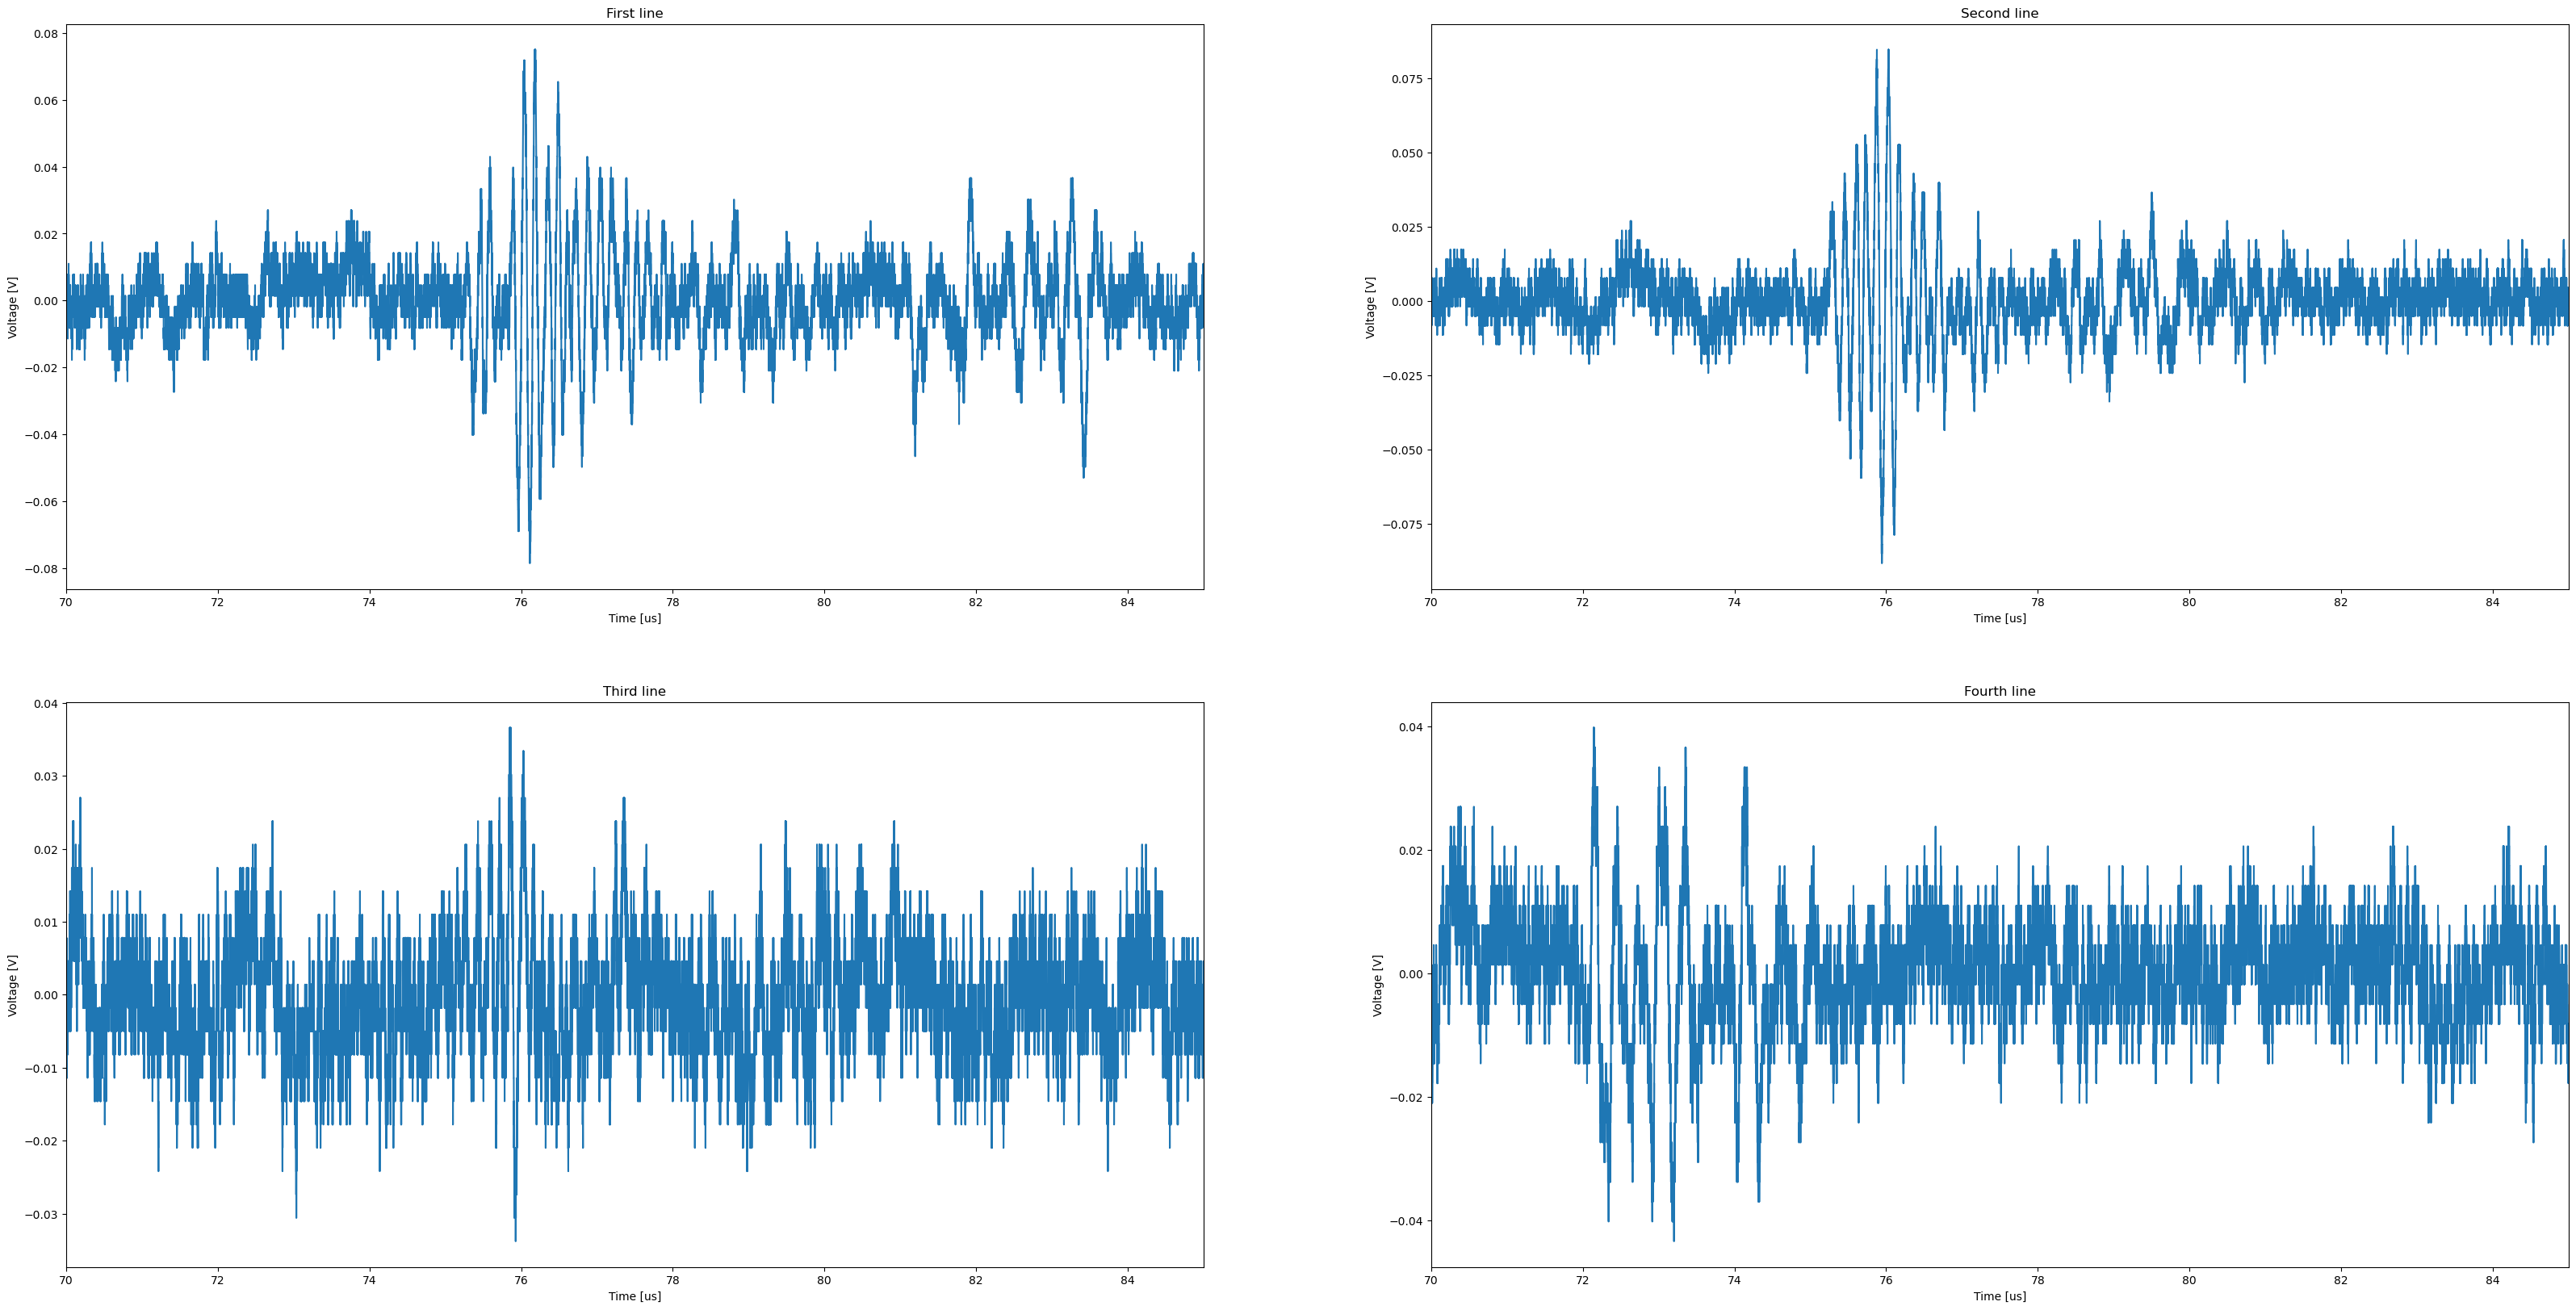

In [23]:
# Plot all data
# plot_all_lines(data)

plt.subplots(2, 2, figsize=(40, 20))
# Plot the first line
plt.subplot(2, 2, 1)
plot_line(data, title='First line', line=0)
# Plot the second line
plt.subplot(2, 2, 2)
plot_line(data, title='Second line', line=1)
# Plot the third line
plt.subplot(2, 2, 3)
plot_line(data, title='Third line', line=2)
# Plot the fourth line
plt.subplot(2, 2, 4)
plot_line(data, title='Fourth line', line=3)

### Preprocessing
We can do many preprocessing steps. Here, we will just remove the DC component.

In [30]:
# Perform Standard pre-processing
%matplotlib qt
plt.subplots(2, 2, figsize=(40, 20))

print('Removing DC component')

remove_dc(data)

# Plot the first line
plt.subplot(2, 2, 1)
plot_line(data, title='First line - DC Removed', line=0)
# Plot the second line
plt.subplot(2, 2, 2)
plot_line(data, title='Second line - DC Removed', line=1)
# Plot the third line
plt.subplot(2, 2, 3)
plot_line(data, title='Third line - DC Removed', line=2)
# Plot the fourth line
plt.subplot(2, 2, 4)
plot_line(data, title='Fourth line - DC Removed', line=3)

Removing DC component


### Frequency Spectrum
We're interested in the frequency spectrum to see what frequency content is contained in the signal.

We can see from the spectrum where we have a peak and if there is one at the resonance frequency of that transducer around $7.5MHz$. If multiple other peaks registered from low frequency components as well this can be adjusted by the right parameters in the Pulser/Receiver and using analog and digital filtering on the signal. 

Resonance frequency for line 1 is 6.799818671502093 MHz
Resonance amplitude for line 1 is 71.91461333864753
Resonance frequency for line 2 is 6.733153782565798 MHz
Resonance amplitude for line 2 is 67.20640498960232
Resonance frequency for line 3 is 0.39998933361777017 MHz
Resonance amplitude for line 3 is 42.05220512753071
Resonance frequency for line 4 is 3.5332391136236363 MHz
Resonance amplitude for line 4 is 51.676743172419485


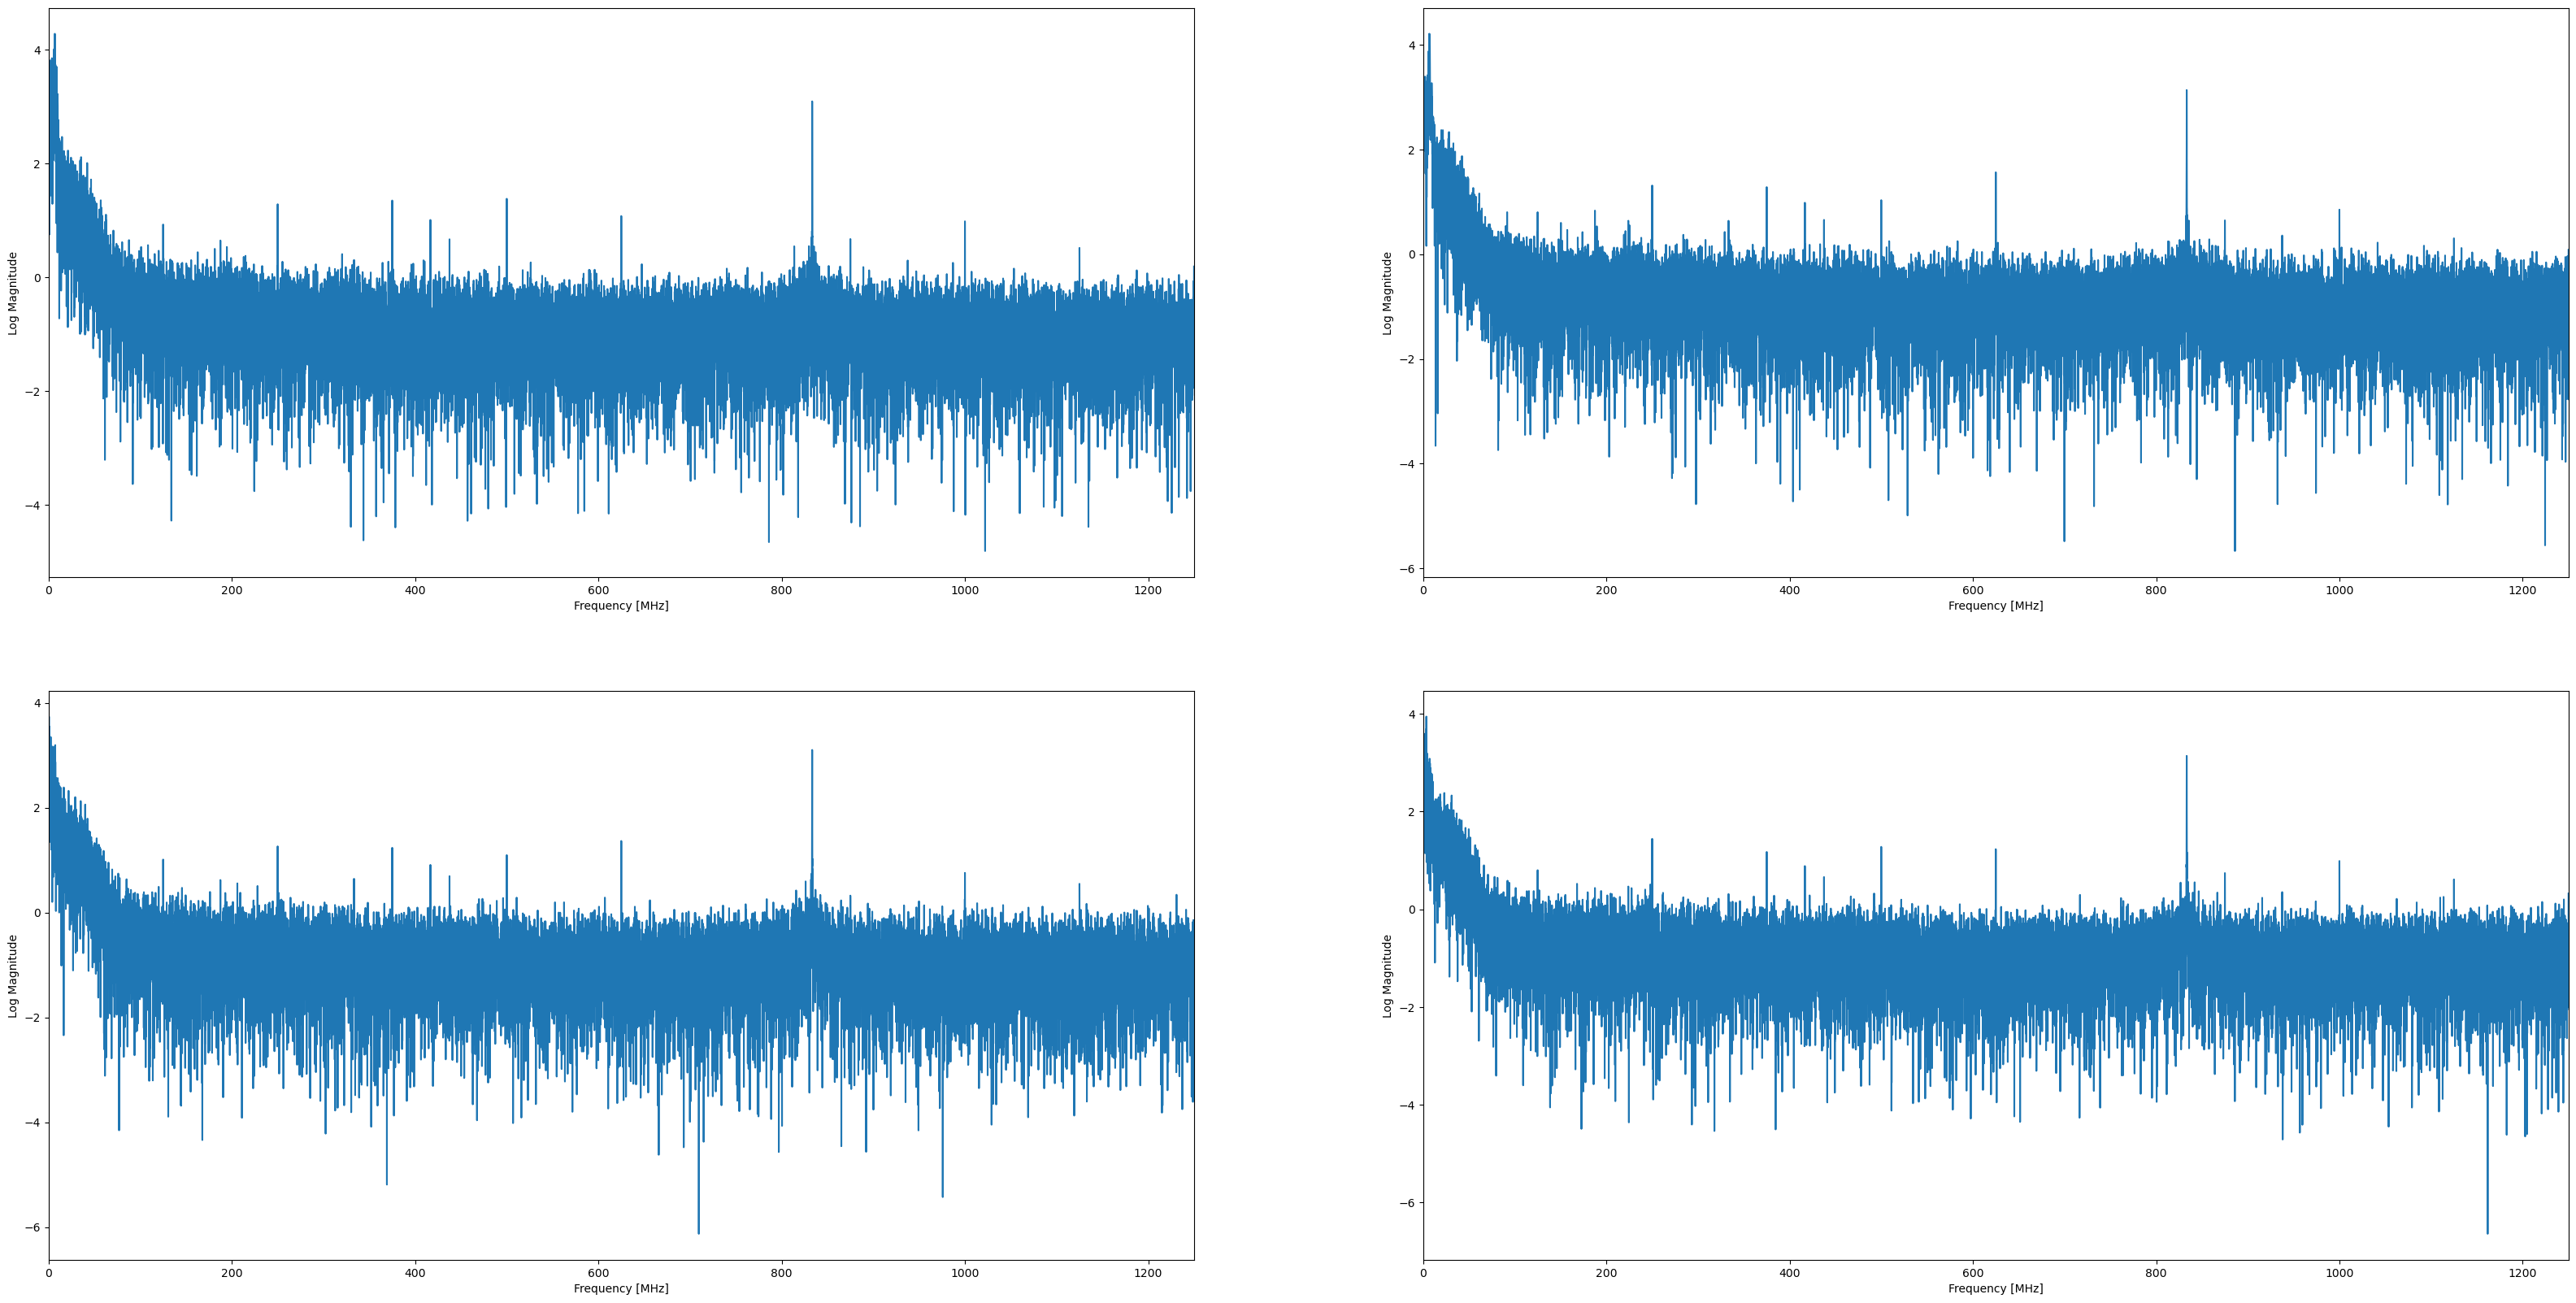

In [25]:
plt.subplots(2, 2, figsize=(40, 20))

# Plot the first line
plt.subplot(2, 2, 1)
f_res, a_res = frequency_spectrum(data,line=0)
print('Resonance frequency for line 1 is {} MHz'.format(f_res / 1e6))
print('Resonance amplitude for line 1 is {}'.format(a_res))

# Plot the second line
plt.subplot(2, 2, 2)
f_res, a_res = frequency_spectrum(data,line=1)
print('Resonance frequency for line 2 is {} MHz'.format(f_res / 1e6))
print('Resonance amplitude for line 2 is {}'.format(a_res))

# Plot the third line
plt.subplot(2, 2, 3)
f_res, a_res = frequency_spectrum(data,line=2)
print('Resonance frequency for line 3 is {} MHz'.format(f_res / 1e6))
print('Resonance amplitude for line 3 is {}'.format(a_res))

# Plot the fourth line
plt.subplot(2, 2, 4)
f_res, a_res = frequency_spectrum(data,line=3)
print('Resonance frequency for line 4 is {} MHz'.format(f_res / 1e6))
print('Resonance amplitude for line 4 is {}'.format(a_res))

## Time Gain Compensation
Assuming that the tissues have attenuated this signal $4Np/m/MHz$ we will compensate for this attenuation and plot the real time-gain-compensated signal. The attenuation is exponential so we can compensate using:

$$ RF_{com}=RF e^{\mu d}\;\;\mu=\alpha f\;\;\;\;\;d=ct\;\;\;c\approx 1500m/s$$

Performing TGC


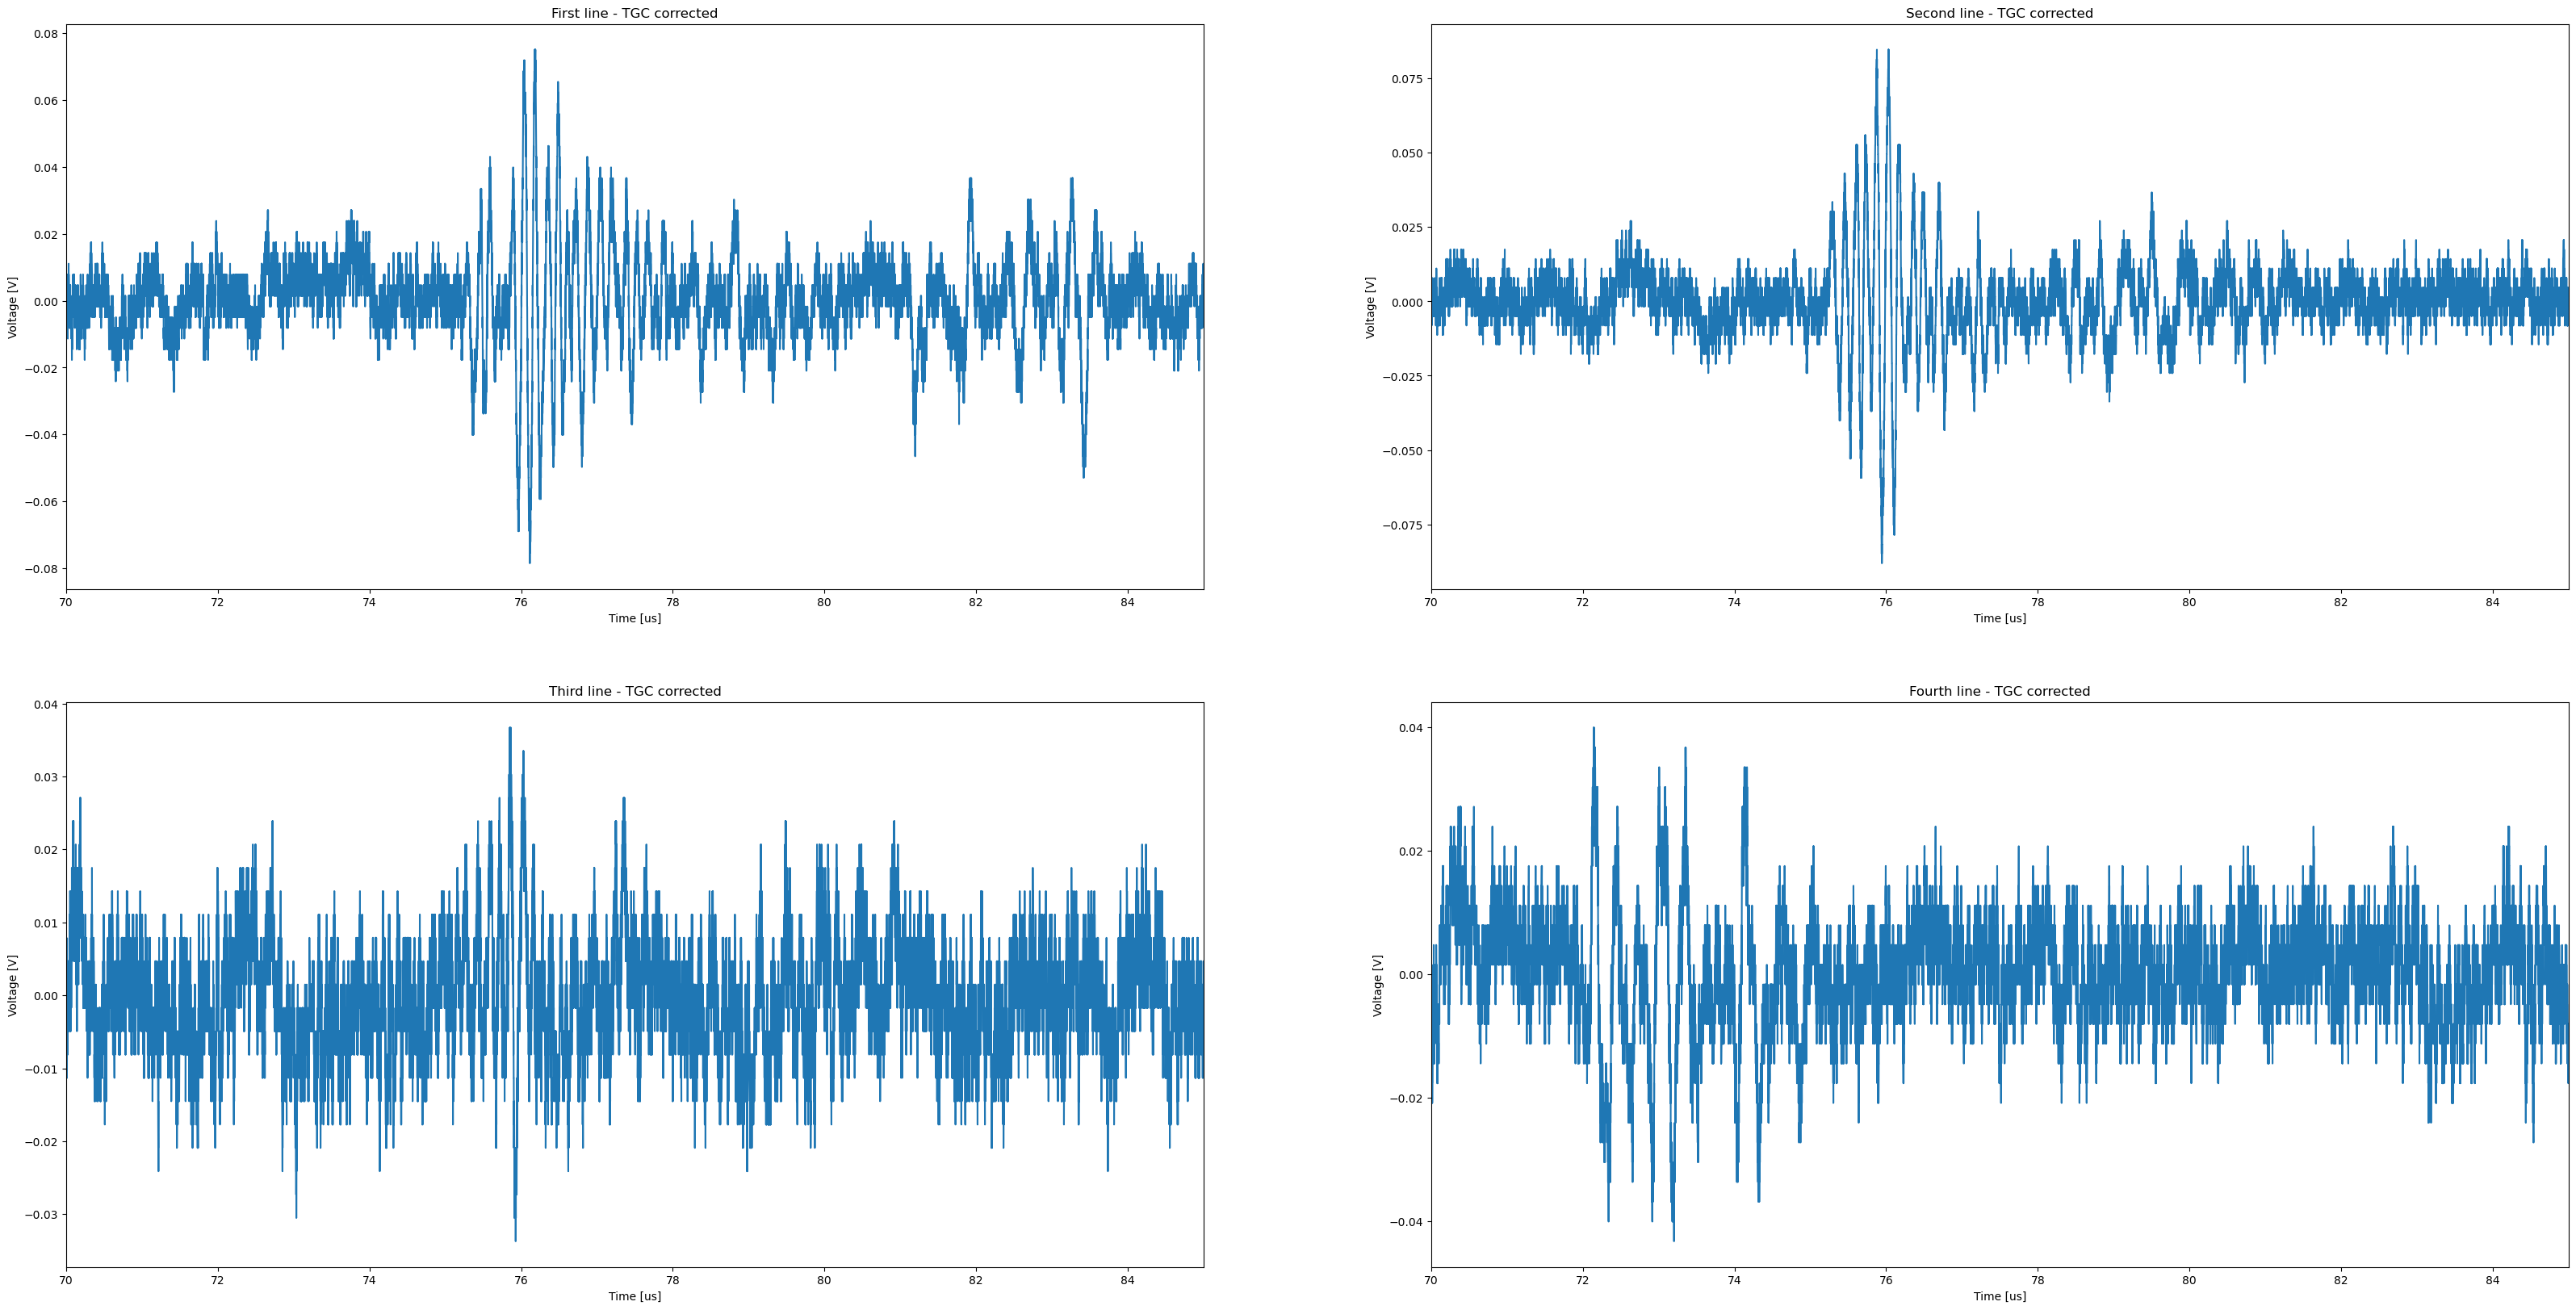

In [26]:
plt.subplots(2, 2, figsize=(40, 20))

print('Performing TGC')

time_gain_compensation(data, speed_of_sound, attenuation, transducer_frequency)

# Plot the first line
plt.subplot(2, 2, 1)
plot_line(data, title='First line - TGC corrected', line=0)
# Plot the second line
plt.subplot(2, 2, 2)
plot_line(data, title='Second line - TGC corrected', line=1)
# Plot the third line
plt.subplot(2, 2, 3)
plot_line(data, title='Third line - TGC corrected', line=2)
# Plot the fourth line
plt.subplot(2, 2, 4)
plot_line(data, title='Fourth line - TGC corrected', line=3)

### Envelope Detection
To prepare for forming an image, we will now obtain the envelope of the signal and plot. This is done using a Hilbert transform.

Performing Evelope Detection


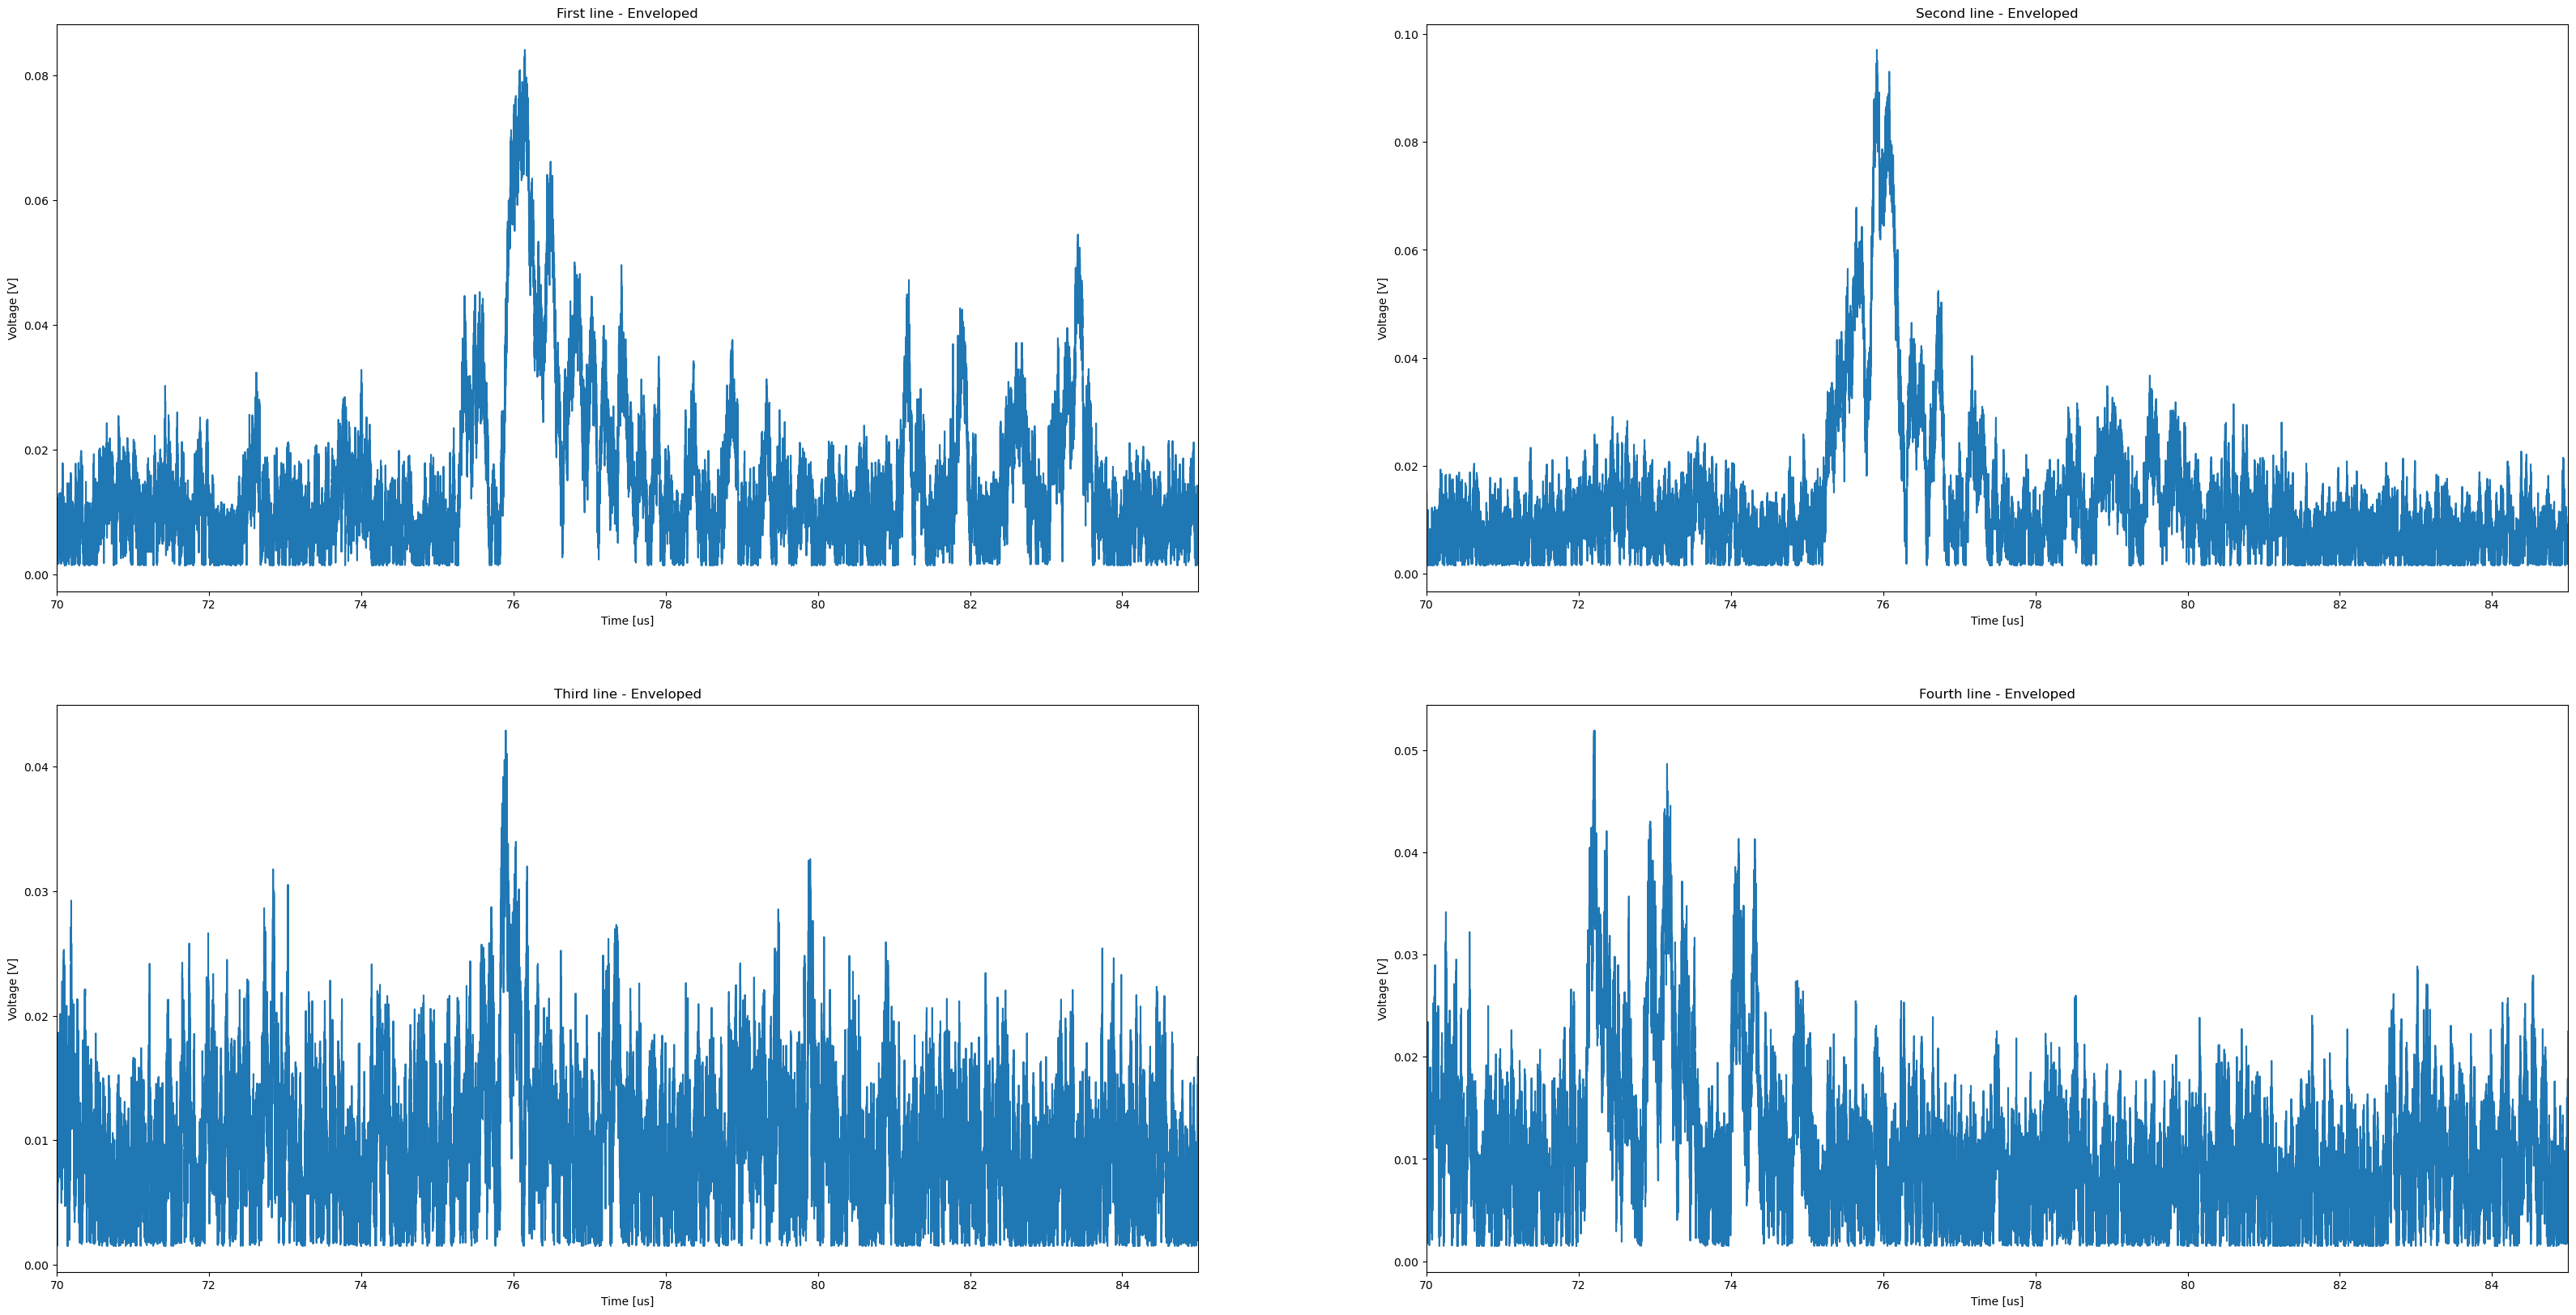

In [27]:
plt.subplots(2, 2, figsize=(40, 20))

print('Performing Evelope Detection')

envelope_detector(data)

# Plot the first line
plt.subplot(2, 2, 1)
plot_line(data, title='First line - Enveloped', line=0)
# Plot the second line
plt.subplot(2, 2, 2)
plot_line(data, title='Second line - Enveloped', line=1)
# Plot the third line
plt.subplot(2, 2, 3)
plot_line(data, title='Third line - Enveloped', line=2)
# Plot the fourth line
plt.subplot(2, 2, 4)
plot_line(data, title='Fourth line - Enveloped', line=3)

### Image Reconstruction

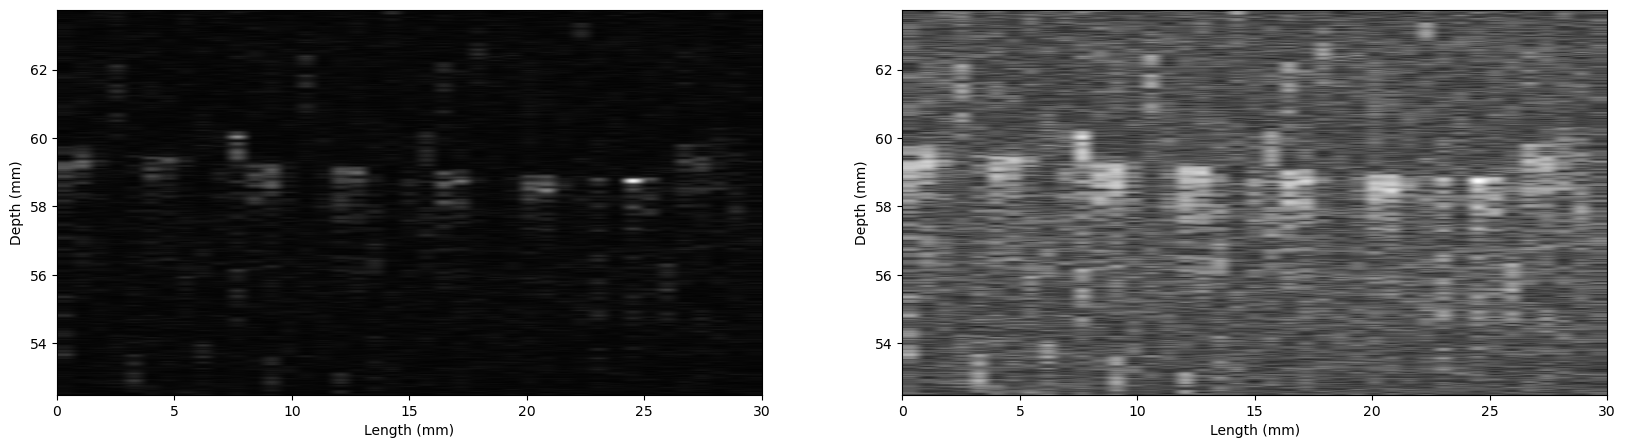

In [28]:
image, depth, transeiver_width = reconstruct_image(data, speed_of_sound, line_width)

plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1, 2, 1)
plot_us_image(image, depth, transeiver_width, use_log=False)
plt.subplot(1, 2, 2)
plot_us_image(image, depth, transeiver_width, use_log=True)

### Image Filtering
We will finally apply one of the most common filters that are used in ultrasound imaging: the median filter. This will make the image less "grainy" to the user. We will also implement a usual "cutoff" in the displayed image, anything less than -60dB will be eliminated. This will work best with actual tissues than for perfect reflectors, why?

/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_76463/2476285365.py:7: RuntimeWarning: divide by zero encountered in divide
  this_image= 20*np.log10(this_image / np.max(this_image.ravel()) + 1e-6)
/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_76463/2476285365.py:7: RuntimeWarning: invalid value encountered in divide
  this_image= 20*np.log10(this_image / np.max(this_image.ravel()) + 1e-6)
/var/folders/fx/jfkhtn2n3lg6dny4fcpzlz3w0000gn/T/ipykernel_76463/2476285365.py:7: RuntimeWarning: invalid value encountered in log10
  this_image= 20*np.log10(this_image / np.max(this_image.ravel()) + 1e-6)


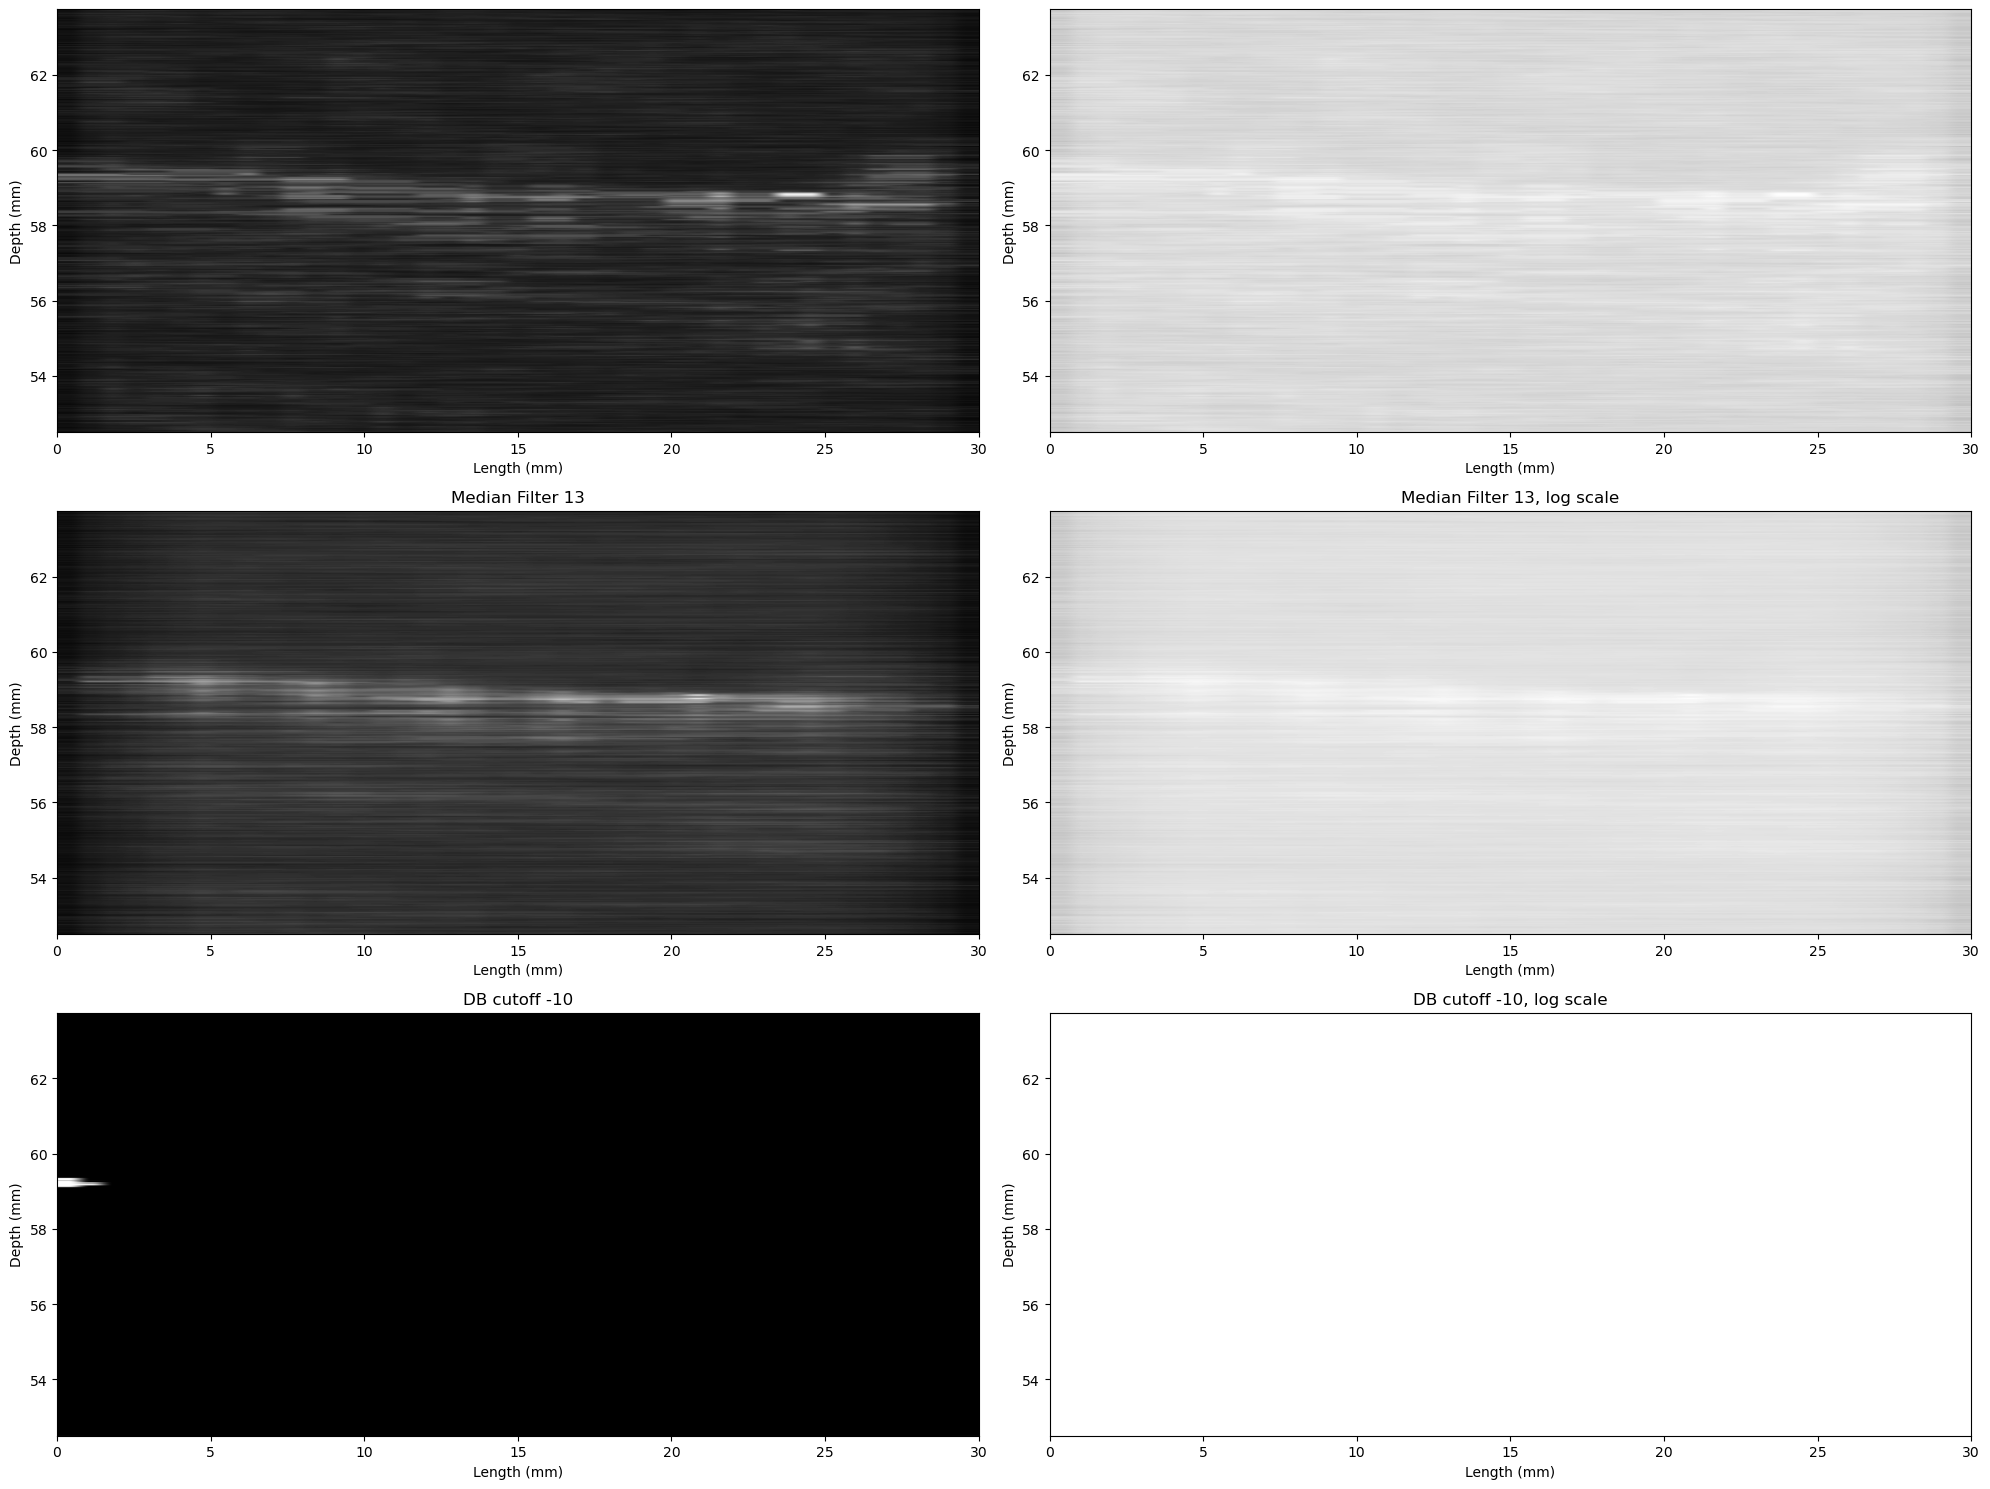

In [29]:
# Remove low response
med_image = image.copy()
med_image_10 = image.copy()
cutdb=-60
cutdb_10 =-10
db_img = 20*np.log10(image / np.max(image.ravel()) + 1e-6)

inx=np.where(db_img<cutdb)
med_image[inx]=cutdb
inx_10 = np.where(db_img<cutdb_10)
med_image_10[inx_10]=cutdb_10

# Median filter
med_image1 = signal.medfilt(med_image, 5)
med_image2 = signal.medfilt(med_image.copy(), 13)
med_image_10 = signal.medfilt(med_image_10, 5)

plt.subplots(3, 2, figsize=(20, 15))
plt.subplot(3, 2, 1)
plot_us_image(med_image1, depth, transeiver_width, use_log=False)
plt.subplot(3, 2, 2)
plot_us_image(med_image1, depth, transeiver_width, use_log=True)
plt.subplot(3, 2, 3)
plt.title("Median Filter 13")
plot_us_image(med_image2, depth, transeiver_width, use_log=False)
plt.subplot(3, 2, 4)
plt.title("Median Filter 13, log scale")
plot_us_image(med_image2, depth, transeiver_width, use_log=True)
plt.subplot(3, 2, 5)
plt.title("DB cutoff -10")
plot_us_image(med_image_10, depth, transeiver_width, use_log=False)
plt.subplot(3, 2, 6)
plt.title("DB cutoff -10, log scale")
plot_us_image(med_image_10, depth, transeiver_width, use_log=True)

plt.tight_layout()

## Question 3 - Image Formation

Answer to the following questions:
<br>1. Is the frequency calculated with the notebook close to the values you calculated in Question 2, sub-question 3 (the value you calculated from the observed signal in the oscilloscope)? Explain what can explain any large and small differences.
<br>2. Is the frequency close to the value expected for this transducer? Why?
<br>3. Discuss the aspect of the reflectors in the image. Why are they not perfect points?
<br>4. Make a sketch of the steps in the code used to form the image including the title of the sections in this notebook and the names of the functions used
<br>5. Investigate what is the Hilbert transform and how is the mathematical expression related to the used in the code (i.e. envelope detection)
<br>6. Compare your reconstructed image to the objects that were imaged and explain the corresponding object and how did you determine this
<br>7. Compare your reconstructed image to the one obtained by your team member(s) with a different dataset, discuss the differences you observe and what could explain them

*Add your answer here*

Answers:

## 1.) When comparing the values obtained from Question 2 for the frequency, a value of 6.72MHz this value is extremely close to the first two line values obtained from notebook, those being 6.79 and 6.73 MHz respectively for Lines 1 and Line 2. The slight difference is most likley due to observation error, as perfectly identifying the peaks between the graphs is difficult. However line 3 and line 4 have very different frequencies. These frequencies could be the result of the transducer detecting "errandt" frequencies such as from vibrations in the ground into the water or simply imprecise readings at the specific time of recording.

## 2.) The frequency is quite close to the expected frequency of 7.5MHz as it less than 1 MHz deviation away. As discussed above there can be other external factors impacting the data collection and susequent calculation, that can lead to a discrepancy.

## 3.) In ultrasound imaging, the reflectors seen in an image are not perfect points because the reflection of the ultrasound waves at tissue interfaces occurs over an area, rather than at a single point. Thus the preciseness of the points can be impacted by how the transducer is moved, and by the fact that as data is aquired as the amalgamation of movements across an area.

## 4.)
 ![Question4](/Users/lucasion/Desktop/BMEN509/BMEN509-UCID30088132/BMEN-509-Lab-3/Report/Question4-Image.png)

## 5.) The Hilbert transform of f(t) is the convolution of f(t) with the signal 1/πt. In ultrasound imaging, the Hilbert transform is often used to perform envelope detection, which involves extracting the amplitude envelope of the ultrasound signal. This is important because the ultrasound signal that is taken by the transducer consists of multiple waveforms with different frequencies and phases, and the envelope can provide a representation of the overall intensity of the signal. In the code this is done using the following logic:

## `The negative half of the frequency spectrum is zeroed out, turning the real-valued signal into a complex signal. The Hilbert transformed signal can be obtained from np.imag(hilbert(x)), and the original signal from np.real(hilbert(x)).`

## This is calculated at: `voltage[:,:] = voltage - np.mean(voltage)`

## 6.) When analyzing the reconstructed image we can see that there are points that occur that occur in relatively consistent intervals, thus leading us to believe that this would correspond most closley to a comb as there is a large discrepancy between the high reflection and the low reflections.

## 7.) When analyzing a contrasting image, I noticed that the relative postion and quality in the subsequent image is different compared to the dataset I utilized.  This could be attributed to the image being taken with a different relevant depth, thus affecting the overall quality of the image as a result of attenuation and distance from the transducer leading to a decrease in spatial resolution.



## Question 4 - Image Filtering

Answer to the following questions:
<br>1. What is the effect of increasing the kernel size of the filter?
<br>2. What is the effect of modifying the cut levels for the image?
<br>3. Can any of the features in the image be seen appropriately without logarithmic scaling? Why?
<br>4. Why was the value of attenuation fixed to 0 Np/m/MHz for this code?
<br>5. What is the line in the code that performs TGC?

*Add your answer here*

# Answers:

## 1.) When increasing the kernel we subsequently increase smoothing. As the kernel size increases, the filter will average over more pixels or data points in the signal. This results in a more pronounced smoothing effect, as the filter will be more likely to remove high-frequency noise and small features in the data.

## Secondly increasing the kernel size can also lead to a lower processing time. This is because as the kernel size increases, the filter will need to perform more calculations for each output pixel. This can result in a slower processing time, which may be very much unwanted.

## 2.) Changing the cut level can impact image by reducing what we are taking in as signal thus making the image unterpretable at a certain point. Moreover, changing the cut level effectively impacts the contrast of the image. Therefore modying the cut levels can wash out the image.

## 3.) It it usually very difficult to see features without logarithmic scaling typically. This is because logarithmic scaling can help show slight nuances in pixel intensities, effectively "boosting" the contrast of the image, making it easier to interpret. However once images pass through a filter, which can perform other types of pixel value intensity equlization, logarithmic scaling can sometimes act redundantly thus not being needed.

## 4.) Because the experiment was performed in water, it can be assumed that the effect of attenuation was negligible, thus we can use the value of 0 Np/m/MHz

## 5.) The line `time_gain_compensation(data, speed_of_sound, attenuation, transducer_frequency)` calls the function `time_gain_compensation`, and the actual TGC is performed in the line:  compensation = np.exp(attenuation * transducer_frequency * depth)`



### Conclusion

## For this lab we learned about ultrasound technology in a very simple experiment with a single element transducer connected to a pulser-reciever connect to an oscciliscope. For this lab we were given data that was aquired as a result of the lab experiment and learned to process the data, and to interpet the results in order to make meaningful conclusions surrounding the experiement. We also utilized tools such as matplotlib to visualize and interpret the visual results of our data, and to make connections between our visual results and what we learned in class